In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X=df
y=cancer['target']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [10]:
from sklearn.svm import SVC

In [11]:
sv = SVC()

In [12]:
sv.fit(X_train,y_train)

C:\Users\Sheik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
pred = sv.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0 42]
 [ 0 72]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

   micro avg       0.63      0.63      0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



C:\Users\Sheik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {'C':[1.0,10.0,100.0,0.1],'gamma':[1,0.1,0.01,0.001]}

In [42]:
gs = GridSearchCV(SVC(probability=False),params,verbose=3)

In [43]:
fitgs.(X_train,y_train)

C:\Users\Sheik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1.0, gamma=1 ..................................................
[CV] ...................... C=1.0, gamma=1, score=0.625, total=   0.0s
[CV] C=1.0, gamma=1 ..................................................
[CV] ...................... C=1.0, gamma=1, score=0.625, total=   0.0s
[CV] C=1.0, gamma=1 ..................................................
[CV] ......... C=1.0, gamma=1, score=0.6291390728476821, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] .................... C=1.0, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] .................... C=1.0, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ....... C=1.0, gamma=0.1, score=0.6291390728476821, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 100.0, 0.1], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [44]:
gs.best_params_

{'C': 1.0, 'gamma': 0.001}

In [45]:
pred_gs = gs.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred_gs))
print(classification_report(y_test,pred_gs))
print(accuracy_score(y_test,pred_gs))

[[37  5]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315


In [31]:
pred_gs = gs.predict_proba(X_test)

In [37]:
pred_prob_gs = np.where(pred_gs[:,0]>.3,0,1)

In [38]:
print(confusion_matrix(y_test,pred_prob_gs))
print(classification_report(y_test,pred_prob_gs))
print(accuracy_score(y_test,pred_prob_gs))

[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [41]:
y_test.shape,pred_gs.shape

((114,), (114, 2))

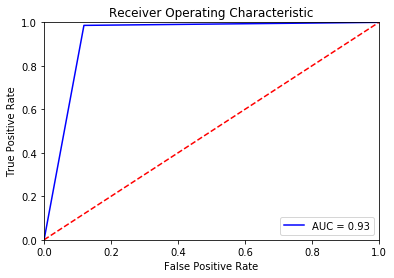

In [49]:
fpr, tpr,threshold= roc_curve(y_test, pred_gs)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()